imports and setup 

In [9]:
import numpy as np
import sep
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.io import fits 


%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]


reads the fits image with astropy 

In [10]:
filename = "image.fits"
data  =fits.getdata(filename).astype(np.float32)


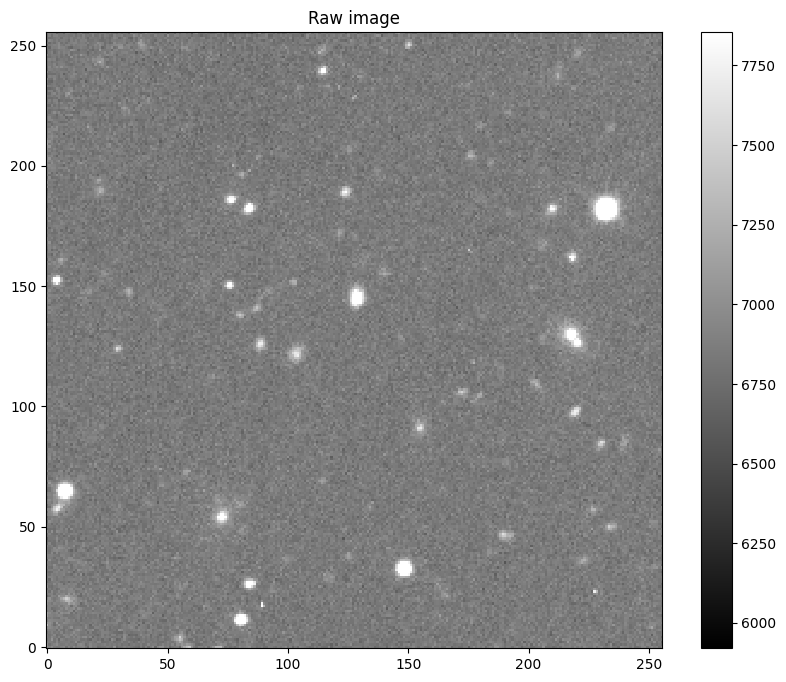

In [11]:
m, s = np.mean(data), np.std(data)

plt.imshow(
    data,
    interpolation='nearest',
    cmap='gray',
    vmin=m - s,
    vmax=m + s,
    origin='lower'
)
plt.colorbar()
plt.title("Raw image")
plt.savefig("fig1_raw_image.png", dpi=150)
plt.show()


In [12]:
bkg = sep.Background(data)
bkg_image = bkg.back()

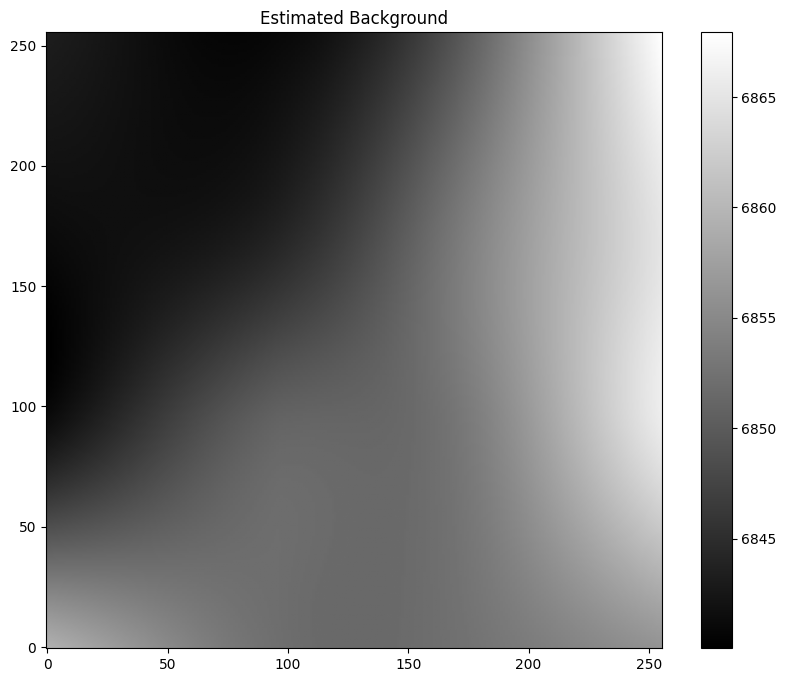

In [15]:
plt.imshow(bkg_image, cmap='gray', origin='lower')
plt.colorbar()
plt.title("Estimated Background")
plt.savefig("fig2_background.png", dpi=150)
plt.show()


In [16]:
data_sub = data - bkg


In [17]:
# local noise estimate
rms = bkg.rms()

# detect objects (3 sigma above background)
objects = sep.extract(data_sub / rms, thresh=3.0)

print("Number of detected objects:", len(objects))


Number of detected objects: 39


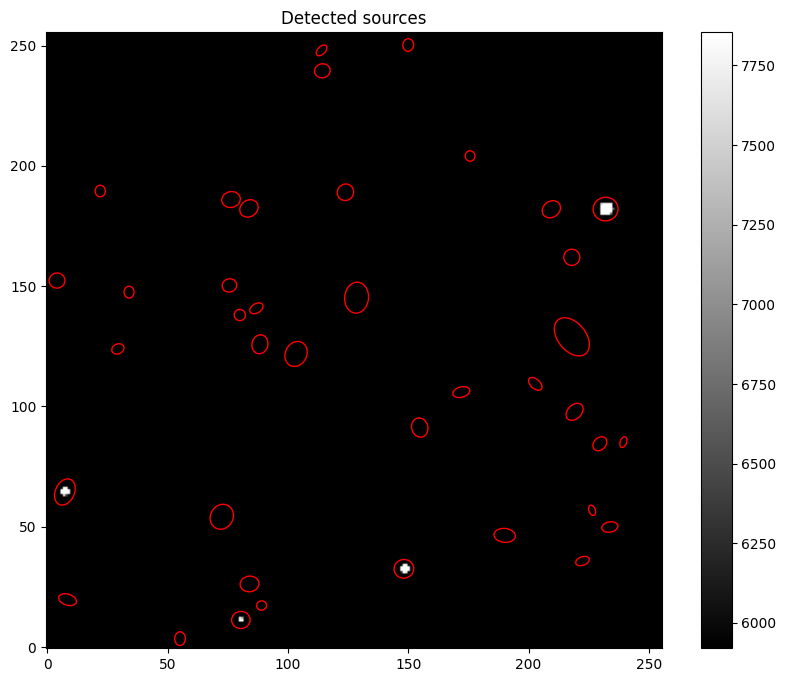

In [18]:
plt.imshow(data_sub, cmap='gray', origin='lower',
           vmin=m - s, vmax=m + s)
plt.title("Detected sources")
plt.colorbar()

ax = plt.gca()

for obj in objects:
    x, y, a, b, theta = obj['x'], obj['y'], obj['a'], obj['b'], obj['theta']
    e = plt.matplotlib.patches.Ellipse(
        xy=(x, y),
        width=6*a,
        height=6*b,
        angle=theta * 180 / np.pi,
        fill=False,
        color='red'
    )
    ax.add_patch(e)

plt.savefig("fig3_detections.png", dpi=150)
plt.show()


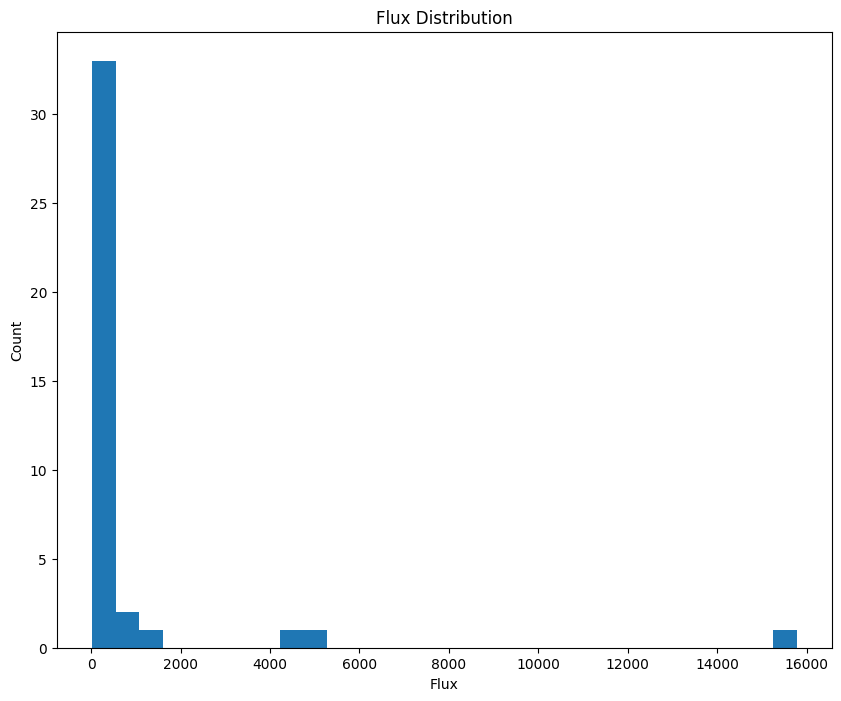

In [19]:
flux = objects['flux']

plt.hist(flux, bins=30)
plt.xlabel("Flux")
plt.ylabel("Count")
plt.title("Flux Distribution")
plt.savefig("fig4_flux_hist.png", dpi=150)
plt.show()
